<a href="https://colab.research.google.com/github/safdaraliacca/Quantitative-Finance-/blob/main/Portfolio_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1773061149.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Imported Data:

Ticker            AAPL       AMZN       GOOGL        META        MSFT
Date                                                                 
2022-12-01  146.247452  95.500000  100.298241  119.702072  249.208374
2022-12-02  145.754410  94.129997   99.752014  122.733376  249.531281
2022-12-05  144.590820  91.010002   98.798576  121.679878  244.815018
2022-12-06  140.922562  88.250000   96.315704  113.420807  239.844330
2022-12-07  138.979965  88.459999   94.289680  113.231956  239.110489
2022-12-08  140.666153  90.349998   93.068100  114.623367  242.075287
2022-12-09  140.182983  89.089996   92.194138  115.189888  240.137894
2022-12-12  142.480560  90.550003   92.670837  114.007179  247.075272
2022-12-13  143.446976  92.489998   94.974945  119.413849  251.390366

Daily Returns:

Ticker          AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2022-12-02 -0.003371 -0.014346 -0.005446  0.025324  0.001296
2022-12-05 -0.007983 -0.033146 -0.009558 -0.008584 -0.018900
2022-12-06 -0.025370 -0.030326 -0.025131 -0.067875 -0.020304
2022-12-07 -0.013785  0.002380 -0.021035 -0.001665 -0.003060
2022-12-08  0.012133  0.021366 -0.012956  0.012288  0.012399
2022-12-09 -0.003435 -0.013946 -0.009391  0.004942 -0.008003
2022-12-12  0.016390  0.016388  0.005171 -0.010267  0.028889
2022-12-13  0.006783  0.021425  0.024863  0.047424  0.017465

Mean Return Calculation for META:

Daily Mean Return: 0.000198

Annualized Mean Return: 0.000198 * 252 = 0.049982

Mean Returns:

Ticker
AAPL    -0.587126
AMZN    -0.951476
GOOGL   -1.684690
META     0.049982
MSFT     0.308120
dtype: float64

Covariance Matrix:

Ticker      AAPL      AMZN     GOOGL      META      MSFT
Ticker                                                  
AAPL    0.048202  0.061208  0.036938  0.072622  0.053873
AMZN    0.061208  0.125794  0.049559  0.108830  0.089187
GOOGL   0.036938  0.049559  0.062584  0.094174  0.047222
META    0.072622  0.108830  0.094174  0.282758  0.079948
MSFT    0.053873  0.089187  0.047222  0.079948  0.076534

Optimized Weights:

Invest 100.00% in META

The optimized portfolio suggests investing 100.00% in META.

This is because:

* META has a high mean return.

* The optimization algorithm has determined that META provides the best risk-return tradeoff, resulting in a high 
Sharpe Ratio.

Based on the analysis, it's recommended to allocate a significant portion of your portfolio to this stock to 
maximize returns while managing risk.

Portfolio Returns:

Date
2022-12-02    0.001296
2022-12-05   -0.018900
2022-12-06   -0.020304
2022-12-07   -0.003060
2022-12-08    0.012399
2022-12-09   -0.008003
2022-12-12    0.028889
2022-12-13    0.017465
dtype: float64

Cumulative Portfolio Returns:

Date
2022-12-02    1.001296
2022-12-05    0.982371
2022-12-06    0.962425
2022-12-07    0.959480
2022-12-08    0.971377
2022-12-09    0.963603
2022-12-12    0.991440
2022-12-13    1.008756
dtype: float64

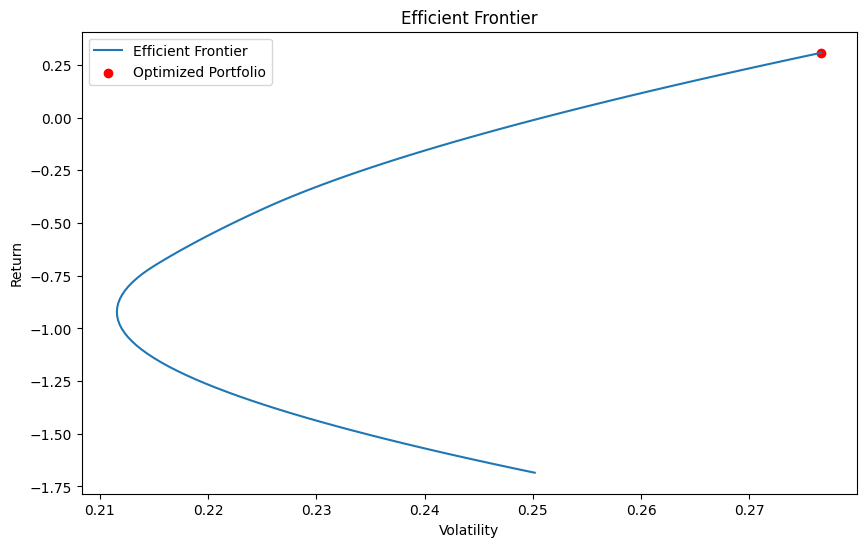

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from rich import print

# Define constants
STOCKS = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META']
START_DATE = '2022-12-01'
END_DATE = '2022-12-14'
RISK_FREE_RATE = 0  # Assuming risk-free rate is 0

# Retrieve stock data
def get_stock_data(stocks, start_date, end_date):
    """Retrieve closing prices for the given stocks and time period"""
    data = yf.download(stocks, start=start_date, end=end_date)['Close']
    return data

# Calculate daily returns
def calculate_daily_returns(data):
    """Calculate daily returns for the given data"""
    returns = data.pct_change().dropna()
    return returns

# Calculate mean returns and covariance matrix
def calculate_mean_returns_and_cov_matrix(returns):
    """Calculate mean returns and covariance matrix"""
    mean_returns = returns.mean() * 252
    cov_matrix = returns.cov() * 252

    # Print calculation for META
    if 'META' in returns.columns:
        daily_mean_return = returns['META'].mean()
        annualized_mean_return = daily_mean_return * 252
        print(f"\nMean Return Calculation for META:")
        print(f"Daily Mean Return: {daily_mean_return:.6f}")
        print(f"Annualized Mean Return: {daily_mean_return:.6f} * 252 = {annualized_mean_return:.6f}")

    return mean_returns, cov_matrix

# Define optimization function
def optimize_portfolio(weights, mean_returns, cov_matrix):
    """Optimize portfolio by maximizing Sharpe Ratio"""
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = -portfolio_return / portfolio_volatility
    return sharpe_ratio

# Define constraints and bounds
def define_constraints_and_bounds(n_stocks):
    """Define constraints and bounds for optimization"""
    weights_init = np.array([1.0 / n_stocks] * n_stocks)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n_stocks))
    return weights_init, constraints, bounds

# Run optimization
def run_optimization(optimize_portfolio, weights_init, constraints, bounds, mean_returns, cov_matrix):
    """Run optimization to find optimal weights"""
    result = minimize(optimize_portfolio, weights_init, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Calculate portfolio returns and cumulative returns
def calculate_portfolio_returns(returns, optimized_weights):
    """Calculate portfolio returns and cumulative returns"""
    portfolio_returns = returns @ optimized_weights
    cumulative_returns = (1 + portfolio_returns).cumprod()
    return portfolio_returns, cumulative_returns

# Plot efficient frontier
def plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights):
    """Plot efficient frontier"""
    target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 100)
    volatilities = []
    for target_return in target_returns:
        constraints_target = ({'type': 'eq', 'fun': lambda x: np.sum(mean_returns * x) - target_return},
                               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        result_target = minimize(lambda x: np.sqrt(np.dot(x.T, np.dot(cov_matrix, x))), np.array([1.0 / len(mean_returns)] * len(mean_returns)), method='SLSQP', bounds=tuple((0, 1) for _ in range(len(mean_returns))), constraints=constraints_target)
        volatilities.append(result_target.fun)

    plt.plot(volatilities, target_returns, label='Efficient Frontier')
    plt.scatter(np.sqrt(np.dot(optimized_weights.T, np.dot(cov_matrix, optimized_weights))), np.sum(mean_returns * optimized_weights), c='red', label='Optimized Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.show()

# Main function
def main():
    data = get_stock_data(STOCKS, START_DATE, END_DATE)
    print("Imported Data:")
    print(data)

    returns = calculate_daily_returns(data)
    print("\nDaily Returns:")
    print(returns)

    mean_returns, cov_matrix = calculate_mean_returns_and_cov_matrix(returns)
    print("\nMean Returns:")
    print(mean_returns)
    print("\nCovariance Matrix:")
    print(cov_matrix)

    weights_init, constraints, bounds = define_constraints_and_bounds(len(STOCKS))
    result = run_optimization(optimize_portfolio, weights_init, constraints, bounds, mean_returns, cov_matrix)
    optimized_weights = result.x
    print("\nOptimized Weights:")
    for stock, weight in zip(STOCKS, optimized_weights):
        if weight > 0.01:
            print(f'Invest {weight*100:.2f}% in {stock}')

    max_weight_stock = STOCKS[np.argmax(optimized_weights)]
    max_weight = np.max(optimized_weights)

    print(f"\nThe optimized portfolio suggests investing [bold magenta]{max_weight*100:.2f}%[/bold magenta] in [bold magenta]{max_weight_stock}[/bold magenta].")
    print("This is because:")
    print(f"* [bold magenta]{max_weight_stock}[/bold magenta] has a high mean return.")
    print(f"* The optimization algorithm has determined that [bold magenta]{max_weight_stock}[/bold magenta] provides the best risk-return tradeoff, resulting in a high Sharpe Ratio.")
    print("Based on the analysis, it's recommended to allocate a significant portion of your portfolio to this stock to maximize returns while managing risk.")

    portfolio_returns, cumulative_returns = calculate_portfolio_returns(returns, optimized_weights)
    print("\nPortfolio Returns:")
    print(portfolio_returns)
    print("\nCumulative Portfolio Returns:")
    print(cumulative_returns)

    plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights)

if __name__ == "__main__":
    main()